# Objectives

- Experiment with generating the background masks
- Pick a grow factor for generating the background masks

# Results

### Picking a growth factor

I think we want to err on the side of being overzealous. If we end up discarding most of the image or even the whole image, that's better than measuring dirtiness on parts of the image that are actually aberrations. grow_factor = 0.0375 seemed to strike a good balance, but then I realized we have another issue...

### Masking away 'invalid' areas removes all the dirty areas.

Using this method of looking only at 'valid area' as determined by the masking method taken from CCI, we end up getting dirtiness = 0 for all images with aberrations because when we find a mask that excludes the large aberration (e.g., a bubble), the mask also excludes all the dirty specks.

This is the case no matter what the growth factor is, as one of the cells below shows.

In [1]:
from skimage.io import imread, imsave
from skimage.util import img_as_float
from skimage.filters import difference_of_gaussians, threshold_otsu
from skimage.segmentation import expand_labels
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import math, os, warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [2]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)
    return img[starty:starty+cropy,startx:startx+cropx]

In [3]:
cropx, cropy = 1448, 1448
sig_min = 1
sig_max1 = 12
sig_max2 = 3

base_dir = '2022-04-27_GB20106_backgrounds_processed'
cols = ['image_name',
        'run_no',
        'lane_no',
        'binarization_threshold',
        'sum_bin_filtered2']

binarization_threshold = 0.05
grow_factor = 0.0375

# Creating a mask

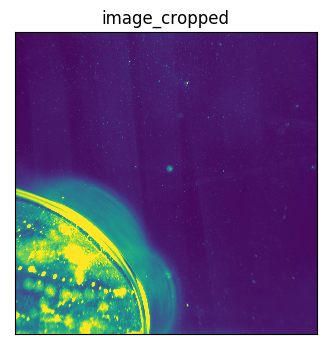

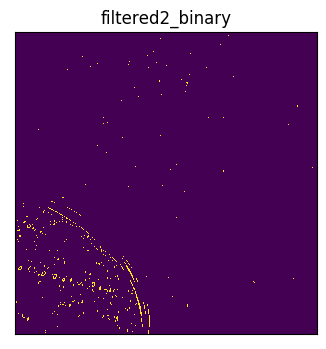

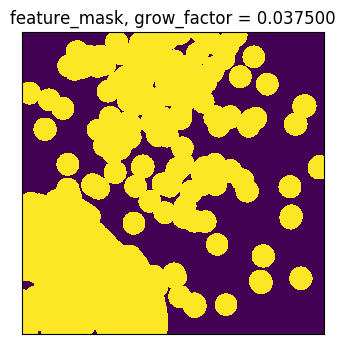

In [10]:
path = '/Users/jenny.vophamhi/Desktop\
/CZB/dirtiness/2022-04-27_GB20106_backgrounds_processed\
/20220413-155750/background-20220413-155750-0_cropped.jpg'
image = imread(path)

image_cropped = crop_center(image,cropx,cropy)
filtered1_image = difference_of_gaussians(image_cropped, sig_min, sig_max1)
filtered2_image = difference_of_gaussians(filtered1_image, sig_min, sig_max2)
filtered2_image[filtered2_image < 0.] = 0.
filtered2_binary = filtered2_image > binarization_threshold

grow_px = filtered2_image.shape[0] * grow_factor
feature_mask = expand_labels(
    filtered2_binary, grow_px)

plt.figure(dpi=100)
plt.title('image_cropped')
plt.imshow(image_cropped)
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(dpi=100)
plt.title('filtered2_binary')
plt.imshow(filtered2_binary)
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(dpi=100)
plt.title('feature_mask, grow_factor = %f' % grow_factor)
plt.imshow(feature_mask)
plt.xticks([])
plt.yticks([])
plt.show()

# Try many different grow_factor values

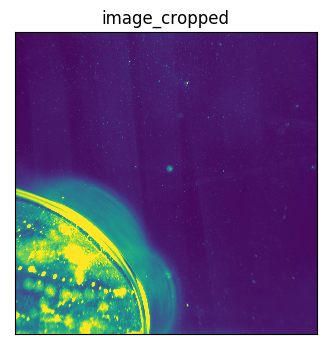

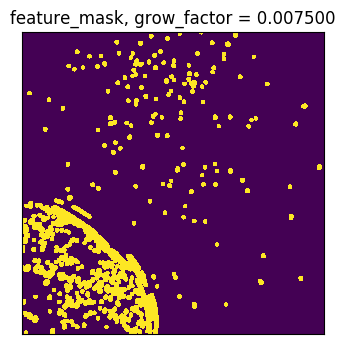

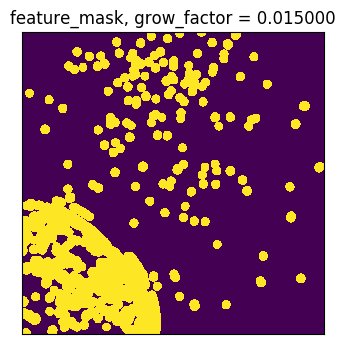

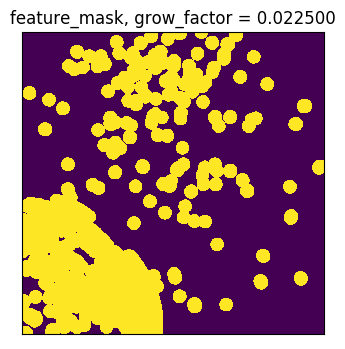

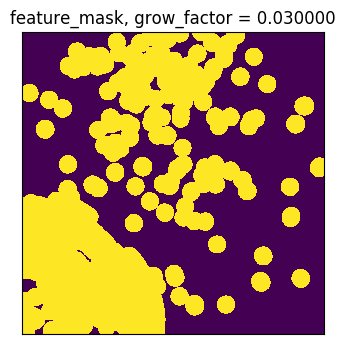

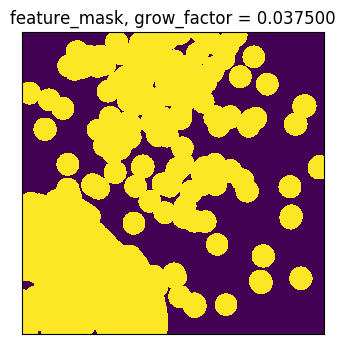

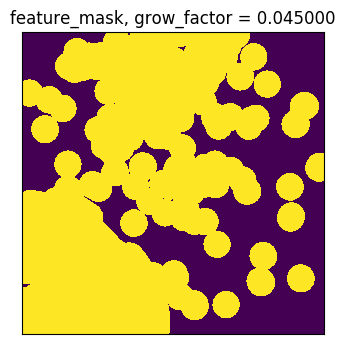

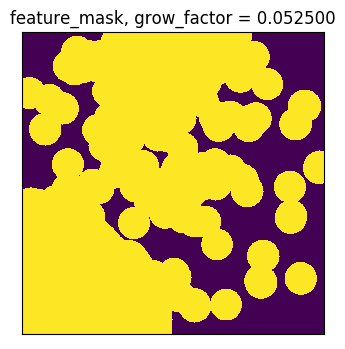

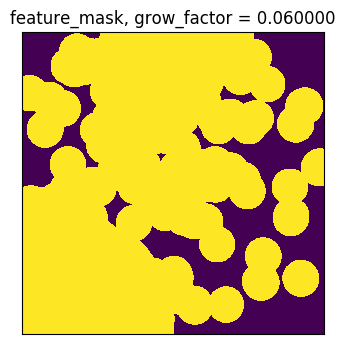

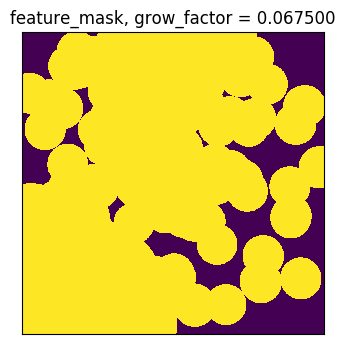

In [7]:
path = '/Users/jenny.vophamhi/Desktop\
/CZB/dirtiness/2022-04-27_GB20106_backgrounds_processed\
/20220413-155750/background-20220413-155750-0_cropped.jpg'
image = imread(path)
image_cropped = crop_center(image,cropx,cropy)

plt.figure(dpi=100)
plt.imshow(image_cropped)
plt.title('image_cropped')
plt.xticks([])
plt.yticks([])
plt.show()

filtered1_image = difference_of_gaussians(image_cropped, sig_min, sig_max1)
filtered2_image = difference_of_gaussians(filtered1_image, sig_min, sig_max2)
filtered2_image[filtered2_image < 0.] = 0.
filtered2_binary = filtered2_image > binarization_threshold

for i in range(1,10):
    grow_factor = i*7.5e-3 # for creating the mask
    grow_px = filtered2_image.shape[0] * grow_factor
    feature_mask = expand_labels(
        filtered2_binary, grow_px)
    plt.figure(dpi=100)
    plt.title('feature_mask, grow_factor = %f' % grow_factor)
    plt.imshow(feature_mask)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Apply mask to identify dirty area in valid region

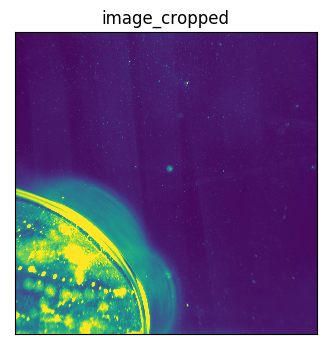

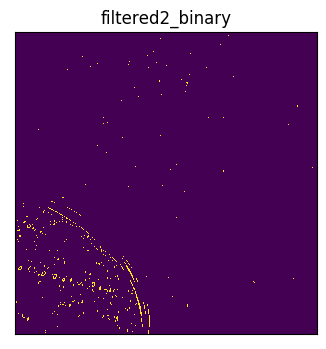

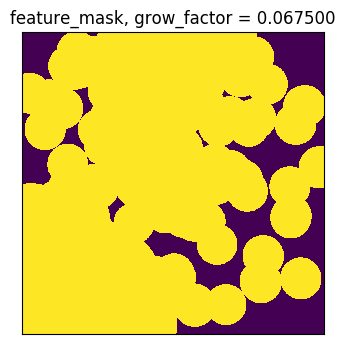

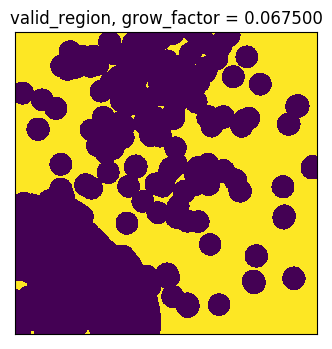

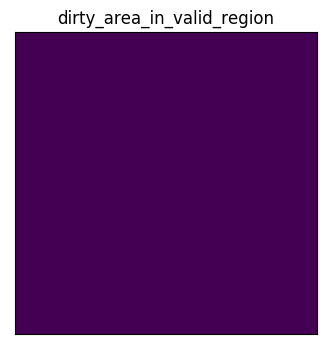

In [16]:
path = '/Users/jenny.vophamhi/Desktop\
/CZB/dirtiness/2022-04-27_GB20106_backgrounds_processed\
/20220413-155750/background-20220413-155750-0_cropped.jpg'
image = imread(path)

image_cropped = crop_center(image,cropx,cropy)
filtered1_image = difference_of_gaussians(image_cropped, sig_min, sig_max1)
filtered2_image = difference_of_gaussians(filtered1_image, sig_min, sig_max2)
filtered2_image[filtered2_image < 0.] = 0.
filtered2_binary = filtered2_image > binarization_threshold

grow_px = filtered2_image.shape[0] * grow_factor
feature_mask = expand_labels(
    filtered2_binary, grow_px)

valid_region = np.logical_not(feature_mask)

dirty_area_in_valid_region = np.logical_and(filtered2_binary, valid_region)

plt.figure(dpi=100)
plt.title('image_cropped')
plt.imshow(image_cropped)
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(dpi=100)
plt.title('filtered2_binary')
plt.imshow(filtered2_binary)
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(dpi=100)
plt.title('feature_mask, grow_factor = %f' % grow_factor)
plt.imshow(feature_mask)
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(dpi=100)
plt.title('valid_region, grow_factor = %f' % grow_factor)
plt.imshow(valid)
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(dpi=100)
plt.title('dirty_area_in_valid_region')
plt.imshow(dirty_area_in_valid_region)
plt.xticks([])
plt.yticks([])
plt.show()

# Problem

Using this method of looking only at 'valid area' as determined by the masking method taken from CCI, weWe end up getting dirtiness = 0 for all images with aberrations because when we find a mask that excludes the large aberration (e.g., a bubble), the mask also excludes all the dirty specks.

This is the case no matter what the growth factor is, as the cell below shows.

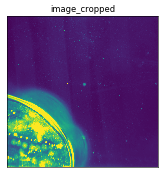

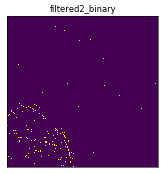

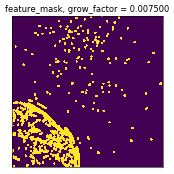

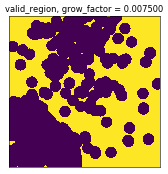

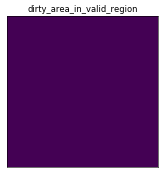

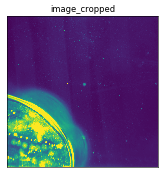

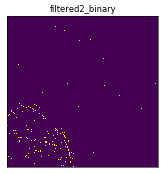

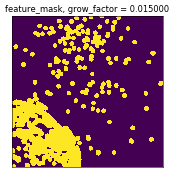

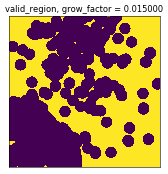

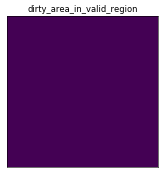

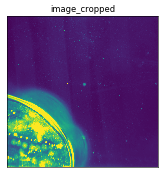

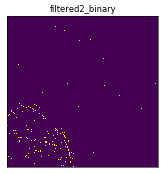

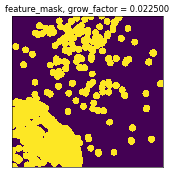

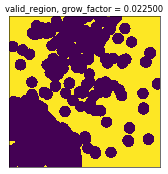

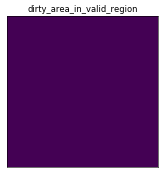

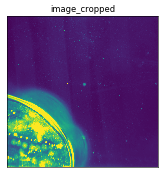

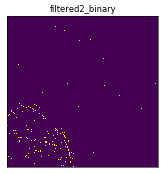

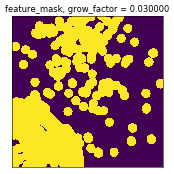

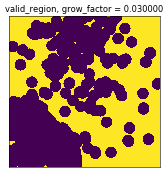

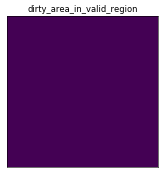

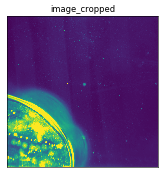

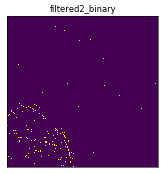

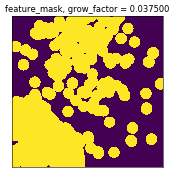

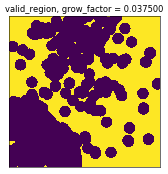

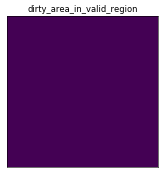

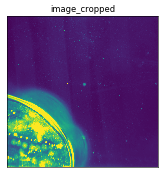

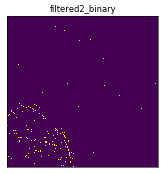

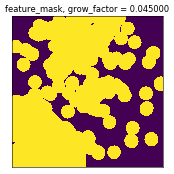

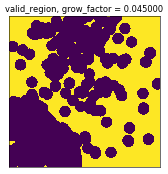

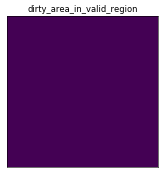

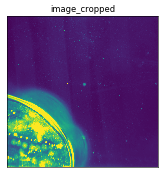

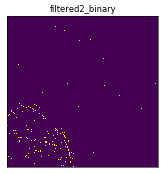

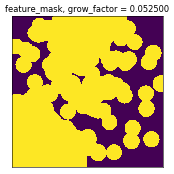

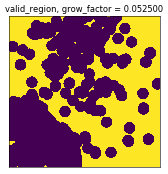

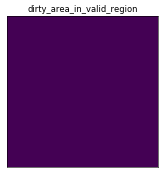

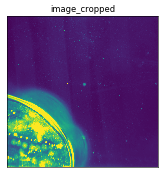

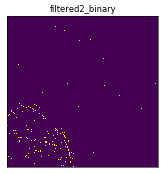

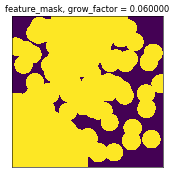

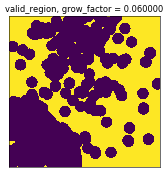

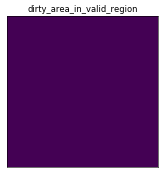

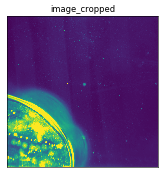

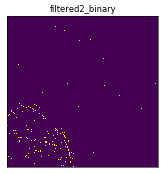

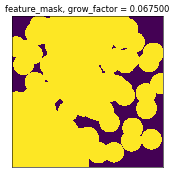

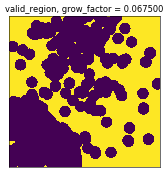

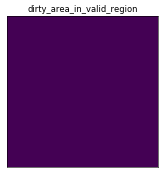

In [17]:
path = '/Users/jenny.vophamhi/Desktop\
/CZB/dirtiness/2022-04-27_GB20106_backgrounds_processed\
/20220413-155750/background-20220413-155750-0_cropped.jpg'
image = imread(path)

image_cropped = crop_center(image,cropx,cropy)
filtered1_image = difference_of_gaussians(image_cropped, sig_min, sig_max1)
filtered2_image = difference_of_gaussians(filtered1_image, sig_min, sig_max2)
filtered2_image[filtered2_image < 0.] = 0.
filtered2_binary = filtered2_image > binarization_threshold

for i in range(1,10):
    grow_factor = i*7.5e-3 # for creating the mask

    grow_px = filtered2_image.shape[0] * grow_factor
    feature_mask = expand_labels(
        filtered2_binary, grow_px)

    valid_region = np.logical_not(feature_mask)

    dirty_area_in_valid_region = np.logical_and(filtered2_binary, valid_region)

    plt.figure(dpi=50)
    plt.title('image_cropped')
    plt.imshow(image_cropped)
    plt.xticks([])
    plt.yticks([])
    plt.show()

    plt.figure(dpi=50)
    plt.title('filtered2_binary')
    plt.imshow(filtered2_binary)
    plt.xticks([])
    plt.yticks([])
    plt.show()

    plt.figure(dpi=50)
    plt.title('feature_mask, grow_factor = %f' % grow_factor)
    plt.imshow(feature_mask)
    plt.xticks([])
    plt.yticks([])
    plt.show()

    plt.figure(dpi=50)
    plt.title('valid_region, grow_factor = %f' % grow_factor)
    plt.imshow(valid)
    plt.xticks([])
    plt.yticks([])
    plt.show()

    plt.figure(dpi=50)
    plt.title('dirty_area_in_valid_region')
    plt.imshow(dirty_area_in_valid_region)
    plt.xticks([])
    plt.yticks([])
    plt.show()